In [ ]:
import numpy as np

x = np.arange(1, 5)
y = np.arange(1, 5)
# x是一个一维数组，x.T无法实现行向量转置为列向量

# [:, None] 的作用是将一维数组转换为二维数组，
# 其中 None 相当于在该位置添加一个新的轴。具体来说：
# : 表示选择数组的所有元素。
# None 表示在该位置添加一个新的轴。
# 通过这种方式，x[:, None] 将原本的一维数组 x 转换为一个列向量（二维数组）
# 其形状从 一维(4,) 变为 二维(4, 1)。这样可以方便地进行广播操作

print(x[:,None])
x[:,None] * y

[1 2 3 4]
[[1]
 [2]
 [3]
 [4]]


array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

In [15]:
import numpy as np

# 计算DCT矩阵（DCT-II）
def dct_matrix(N):
    # 初始化DCT矩阵
    C = np.zeros((N, N))
    for k in range(N):
        for n in range(N):
            C[k, n] = np.sqrt(2 / N) * np.cos(np.pi * (2 * n + 1) * k / (2 * N))
    # 对第一个行做归一化

    k = np.arange(N).reshape((N, 1))  # k 是列向量
    n = np.arange(N)  # n 是行向量
    # 计算每个元素值：C[k, n] = sqrt(2/N) * cos(π (2n + 1) k / (2N))
    C = np.sqrt(2 / N) * np.cos(np.pi * (2 * n + 1) * k / (2 * N))
    
    
    C[0, :] = C[0, :] / np.sqrt(2)
    return C

# 计算DCT（二次变换）
def dct2d_using_matrix(matrix):
    N, M = matrix.shape
    
    # 获取DCT矩阵
    row_dct_matrix = dct_matrix(N)
    col_dct_matrix = dct_matrix(M)
    
    # 按行计算DCT
    intermediate = row_dct_matrix @ matrix  # 行方向
    # 按列计算DCT
    result = intermediate @ col_dct_matrix.T  # 列方向
    
    return result

# 输入矩阵
matrix = np.array([
    [0, 1, 1, 0],
    [0, 1, 1, 0],
    [0, 1, 1, 0],
    [0, 1, 1, 0]
])

# 计算二维DCT
dct_result = dct2d_using_matrix(matrix)

print(dct_result)


[[ 2.00000000e+00  1.11022302e-16 -2.00000000e+00 -4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16 -6.16297582e-33  1.11022302e-16  2.46519033e-32]
 [-2.77555756e-16 -2.15704154e-32  2.77555756e-16  5.54667824e-32]]


In [7]:
N=4
x=np.arange(N)
u=np.arange(N)
W_x = np.sqrt(2/N)*np.cos(np.pi * (2 * u[:, None] + 1) * x / (2 * N))

print((2 * u[:, None] + 1) * x)

[[ 0  1  2  3]
 [ 0  3  6  9]
 [ 0  5 10 15]
 [ 0  7 14 21]]


In [21]:
# compute the Haar matrix

def haarMatrix(n, normalized=False):
    # Allow only size n of power 2
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
        
        # combine parts
        h = 1/np.sqrt(n)*np.vstack((h_n, h_i))
        
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
        # combine parts     
        h = np.vstack((h_n, h_i))
    
    return h

H2=haarMatrix(2)
H4=haarMatrix(4)
print(H4@H4.T)

print("normalized :")
H4_norm=haarMatrix(4,normalized=True)
print(H4_norm@H4_norm.T)

[[4. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]]
normalized :
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


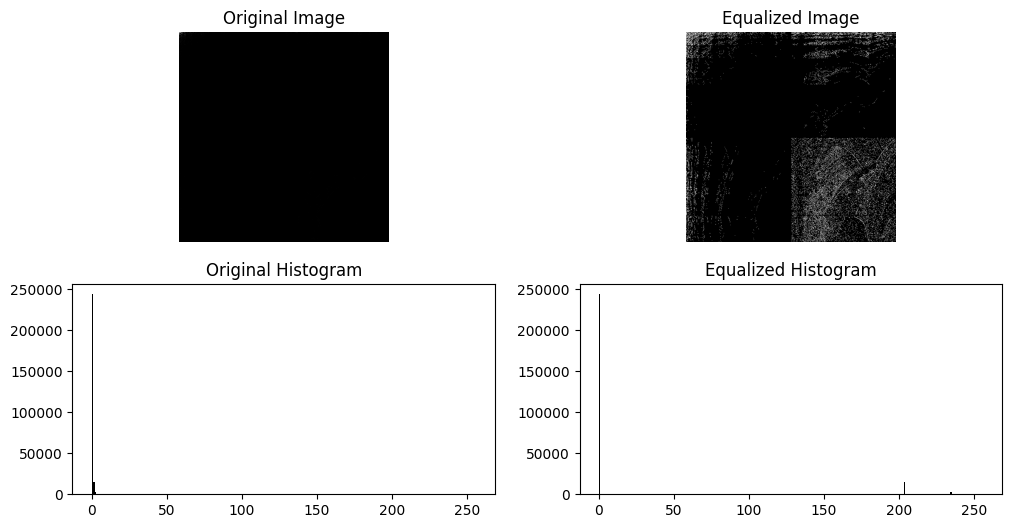

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def histogram_equalization(image):
    # 将图像转换为灰度图像（如果是彩色图像）
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 获取图像的高度、宽度
    height, width = image.shape
    # 计算图像的灰度直方图
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    # 计算累积分布函数（CDF）
    cdf = hist.cumsum()
    # 归一化累积分布函数
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    
    # 计算映射函数
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    
    # 使用映射函数进行直方图均衡化
    equalized_image = cdf_final[image]
    
    return equalized_image, cdf, cdf_final

# 加载图像
image = cv2.imread('haar.bmp', cv2.IMREAD_GRAYSCALE)

# 执行直方图均衡化
equalized_image, cdf, cdf_final = histogram_equalization(image)

# 显示结果
plt.figure(figsize=(12, 6))

# 显示原始图像
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 显示均衡化后的图像
plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

cv2.imwrite('haar_equalized.bmp', equalized_image)

# plt.show()

# 显示直方图
# plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.hist(image.flatten(), bins=256, range=(0, 256), color='black')
plt.title('Original Histogram')

plt.subplot(2, 2, 4)
plt.hist(equalized_image.flatten(), bins=256, range=(0, 256), color='black')
plt.title('Equalized Histogram')

plt.show()
